In [1]:
import matplotlib.pyplot as plt

In [2]:
import torch
from torch import nn

In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [4]:
train_data = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(train_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [5]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')

In [16]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
        self.decoder = nn.Sequential(
            nn.Linear(10, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 28*28),
            nn.Sigmoid(),
        )
    
    def forward(self, x):
        x_ = self.flatten(x)
        z = self.encoder(x_)
        y = self.decoder(z).reshape(x.shape)
        return y

In [7]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (x, _) in enumerate(dataloader):
        x = x.to(device)
        y = model(x)
        loss = loss_fn(y, x)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), (batch+1) * len(x)
            print(f'loss: {loss:>7f} [{current:>5d}/{size:>5d}]')

In [12]:
def test(dataloader, model, loss_fn):
    num_batches = len(dataloader)
    test_loss = 0
    
    with torch.no_grad():
        for batch, (x, _) in enumerate(dataloader):
            x = x.to(device)
            y = model(x)
            loss = loss_fn(y, x).item()
            test_loss += loss
            
            if batch % 50 == 0:
                f, a = plt.subplots(2, 5, figsize=(5, 2))
                for i in range(5):
                    img = torch.Tensor.cpu(x)[i][0]
                    a[0][i].imshow(img, cmap='gray')
                    a[0][i].set_xticks(()); a[0][i].set_yticks(())
                    img2 = torch.Tensor.cpu(y)[i][0]
                    a[1][i].imshow(img2, cmap='gray')
                    a[1][i].set_xticks(()); a[1][i].set_yticks(())
    
    test_loss /= num_batches
    print(f'Avg loss: {test_loss}')

In [13]:
model = AutoEncoder().to(device)

In [14]:
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()

Epoch 1
---------------------------
loss: 0.230988 [   64/60000]
loss: 0.060674 [ 6464/60000]
loss: 0.039839 [12864/60000]
loss: 0.037546 [19264/60000]
loss: 0.029719 [25664/60000]
loss: 0.026580 [32064/60000]
loss: 0.022438 [38464/60000]
loss: 0.023351 [44864/60000]
loss: 0.021386 [51264/60000]
loss: 0.021046 [57664/60000]
Avg loss: 0.022307251123296228
Epoch 2
---------------------------
loss: 0.021187 [   64/60000]
loss: 0.018475 [ 6464/60000]
loss: 0.017977 [12864/60000]
loss: 0.019450 [19264/60000]
loss: 0.018408 [25664/60000]
loss: 0.019306 [32064/60000]
loss: 0.016961 [38464/60000]
loss: 0.018983 [44864/60000]
loss: 0.016369 [51264/60000]
loss: 0.018072 [57664/60000]
Avg loss: 0.01923230607181218
Epoch 3
---------------------------
loss: 0.018222 [   64/60000]
loss: 0.015607 [ 6464/60000]
loss: 0.015378 [12864/60000]
loss: 0.017297 [19264/60000]
loss: 0.016247 [25664/60000]
loss: 0.017376 [32064/60000]
loss: 0.015089 [38464/60000]
loss: 0.017054 [44864/60000]
loss: 0.014853 [512

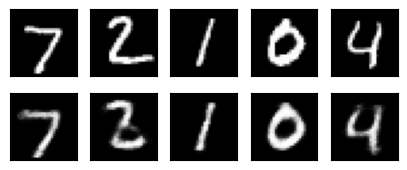

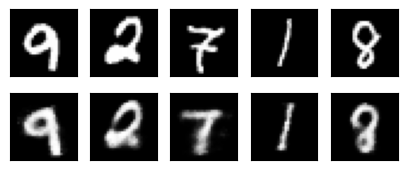

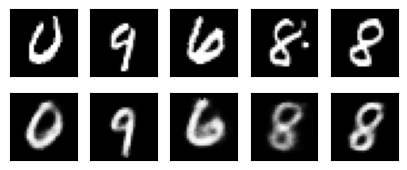

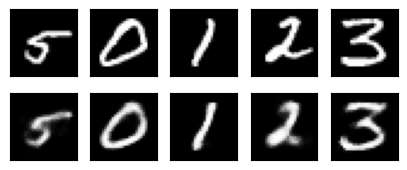

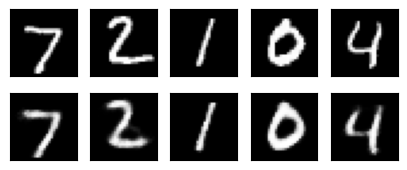

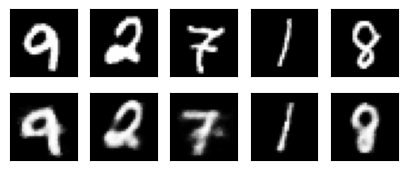

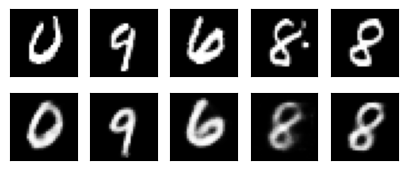

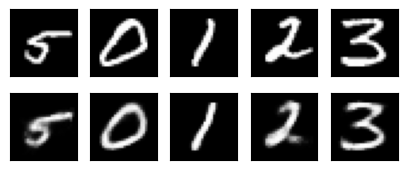

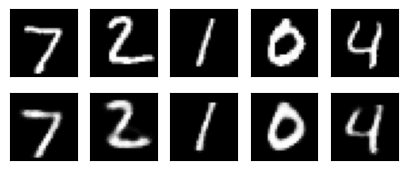

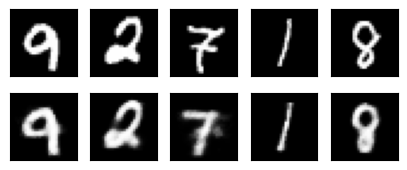

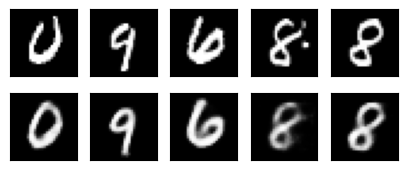

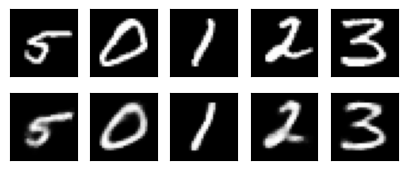

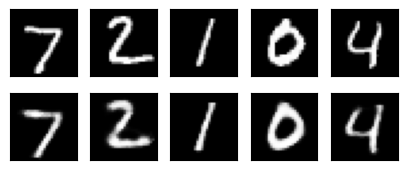

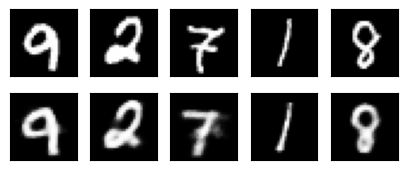

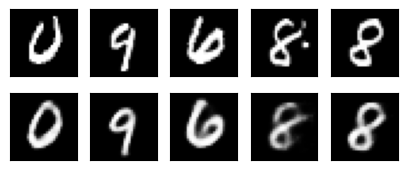

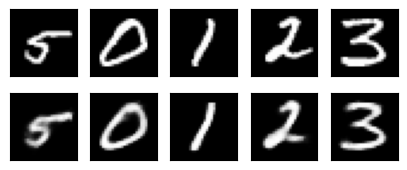

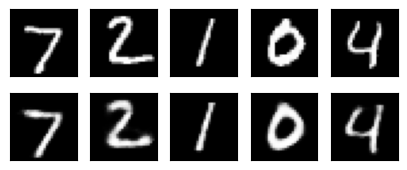

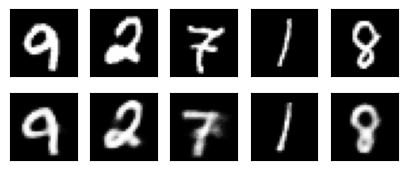

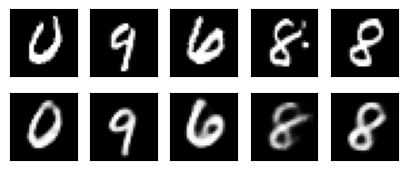

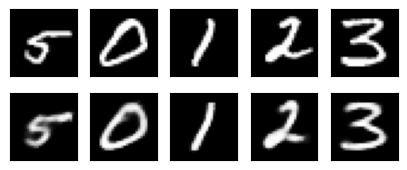

In [15]:
epochs = 5
for i in range(epochs):
    print(f'Epoch {i+1}\n---------------------------')
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)